In [ ]:
#Running all regression ML with 6 feature (Linear regression ) add Pu1_1, E_hybrid_1, 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("transformed_data.csv")

# Define features based on correlation data
selected_features = ["seedNumber_3", "seedEbest_1", "seedNumber_1","E_diff_12", "pumin5_8d", "pumin1_4d", "Pu1_1", "E_hybrid_1", "E_1","pumin5_8u", "pumin1_4u"]

y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="R2 Score", ascending=False))


                        R2 Score       MAE      RMSE
Support Vector Machine  0.473696  0.072238  0.092852
Gradient Boosting       0.399139  0.063716  0.099211
K-Nearest Neighbors     0.350874  0.060250  0.103119
Linear Regression       0.284597  0.069463  0.108255
Random Forest           0.276869  0.071431  0.108838
Decision Tree          -1.460130  0.122500  0.200749


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("transformed_data.csv")

# Define features based on correlation data
selected_features = ["seedNumber_3", "seedEbest_1", "seedNumber_1", "E_diff_12", 
                     "pumin5_8d", "pumin1_4d", "Pu1_1", "E_hybrid_1", "E_1", 
                     "pumin5_8u", "pumin1_4u", "E_diff_12"]

y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models without cross-validation
results_no_cv = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results_no_cv[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}

# Display results without cross-validation
results_no_cv_df = pd.DataFrame(results_no_cv).T
print("Results without Cross-Validation:")
print(results_no_cv_df.sort_values(by="R2 Score", ascending=False))

# Train and evaluate models with cross-validation
results_with_cv = {}
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring="neg_mean_squared_error", return_train_score=False)
    
    # Extract R², MAE, and RMSE-like metrics from cross-validation
    r2_cv = -cv_results['test_score'].mean()  # Convert negative MSE to RMSE (negative because lower is better)
    mae_cv = np.mean(np.abs(cv_results['test_score']))  # Mean Absolute Error approximation
    rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)
    
    results_with_cv[name] = {"R2 Score (CV)": r2_cv, "MAE (CV)": mae_cv, "RMSE (CV)": rmse_cv}

# Display results with cross-validation
results_with_cv_df = pd.DataFrame(results_with_cv).T
print("\nResults with Cross-Validation:")
print(results_with_cv_df.sort_values(by="R2 Score (CV)", ascending=False))


Results without Cross-Validation:
                        R2 Score       MAE      RMSE
Decision Tree           0.881359  0.035714  0.046445
Support Vector Machine  0.459375  0.067838  0.099145
Linear Regression       0.361880  0.065824  0.107714
Random Forest           0.351013  0.067036  0.108628
K-Nearest Neighbors     0.311994  0.075000  0.111846
Gradient Boosting       0.284198  0.075036  0.114082


/tmp/ipykernel_3693691/3885024346.py:66: RuntimeWarning: invalid value encountered in sqrt
  rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)
/tmp/ipykernel_3693691/3885024346.py:66: RuntimeWarning: invalid value encountered in sqrt
  rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)



Results with Cross-Validation:
                        R2 Score (CV)  MAE (CV)  RMSE (CV)
Decision Tree                0.021384  0.021384        NaN
Gradient Boosting            0.013623  0.013623        NaN
Random Forest                0.012165  0.012165        NaN
K-Nearest Neighbors          0.011672  0.011672        NaN
Support Vector Machine       0.010827  0.010827        NaN
Linear Regression            0.009829  0.009829        NaN


/tmp/ipykernel_3693691/3885024346.py:66: RuntimeWarning: invalid value encountered in sqrt
  rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)
/tmp/ipykernel_3693691/3885024346.py:66: RuntimeWarning: invalid value encountered in sqrt
  rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)
/tmp/ipykernel_3693691/3885024346.py:66: RuntimeWarning: invalid value encountered in sqrt
  rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)
/tmp/ipykernel_3693691/3885024346.py:66: RuntimeWarning: invalid value encountered in sqrt
  rmse_cv = np.sqrt(-r2_cv)  # RMSE approximation (negative, so we take the square root of the mean MSE)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("transformed_data.csv")

# Define features based on correlation data
selected_features = ["seedNumber_3", "seedEbest_1", "seedNumber_1", "E_diff_12", "pumin5_8d", "pumin1_4d", "Pu1_1", "E_hybrid_1", "E_1", "pumin5_8u", "pumin1_4u", "E_diff_12"]

y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}
    
    results_df = pd.DataFrame(results).T
    return results_df.sort_values(by="R2 Score", ascending=False)

# **1. Without Normalization or Standardization**
results_no_scaling = evaluate_models(X_train, X_test, y_train, y_test)

# **2. With Standardization (StandardScaler)**
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

results_standardized = evaluate_models(X_train_standardized, X_test_standardized, y_train, y_test)

# **3. With Normalization (MinMaxScaler)**
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

results_normalized = evaluate_models(X_train_normalized, X_test_normalized, y_train, y_test)

# Display Results
print("Results without scaling:\n", results_no_scaling)
print("\nResults with Standardization:\n", results_standardized)
print("\nResults with Normalization:\n", results_normalized)


Results without scaling:
                         R2 Score       MAE      RMSE
Decision Tree           0.881359  0.035714  0.046445
Linear Regression       0.361880  0.065824  0.107714
Random Forest           0.354117  0.066807  0.108368
Gradient Boosting       0.284198  0.075036  0.114082
K-Nearest Neighbors     0.248321  0.073571  0.116907
Support Vector Machine  0.085464  0.090970  0.128950

Results with Standardization:
                         R2 Score       MAE      RMSE
Decision Tree           0.881359  0.035714  0.046445
Support Vector Machine  0.459375  0.067838  0.099145
Linear Regression       0.361880  0.065824  0.107714
Random Forest           0.351013  0.067036  0.108628
K-Nearest Neighbors     0.311994  0.075000  0.111846
Gradient Boosting       0.284198  0.075036  0.114082

Results with Normalization:
                         R2 Score       MAE      RMSE
Decision Tree           0.881359  0.035714  0.046445
Support Vector Machine  0.485932  0.066712  0.096679
K-Nearest N

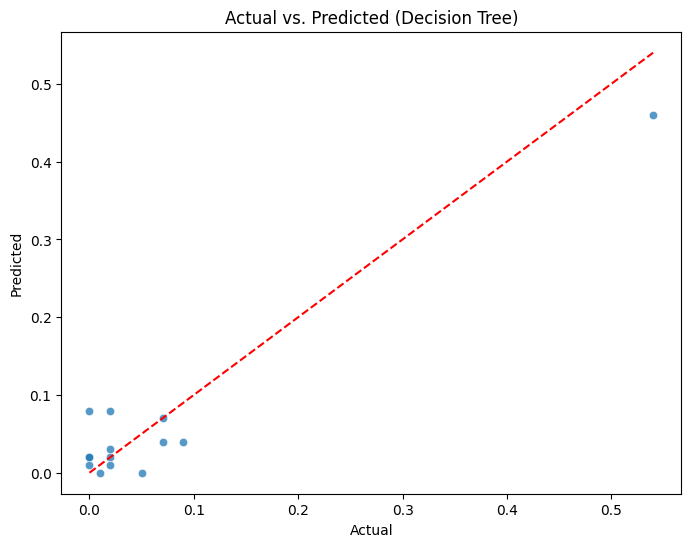

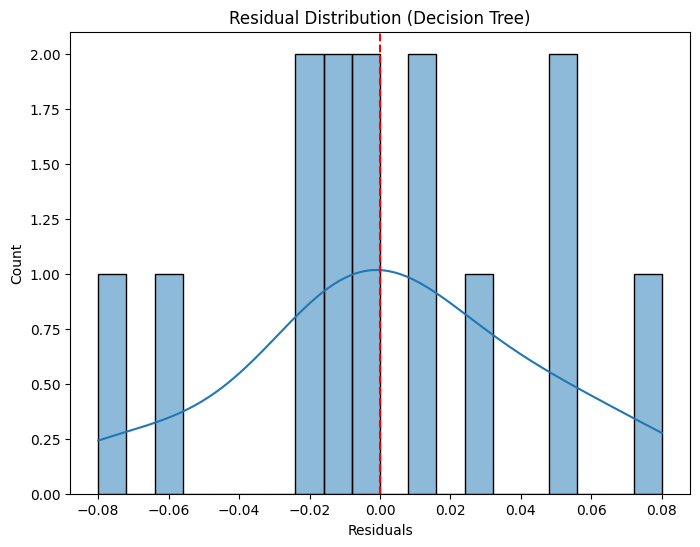

/tmp/ipykernel_3710340/2100686645.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


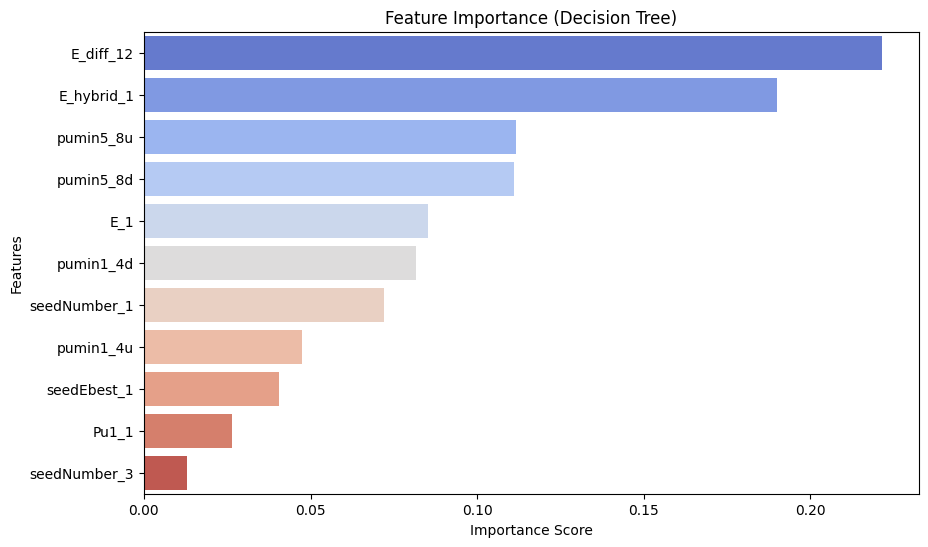

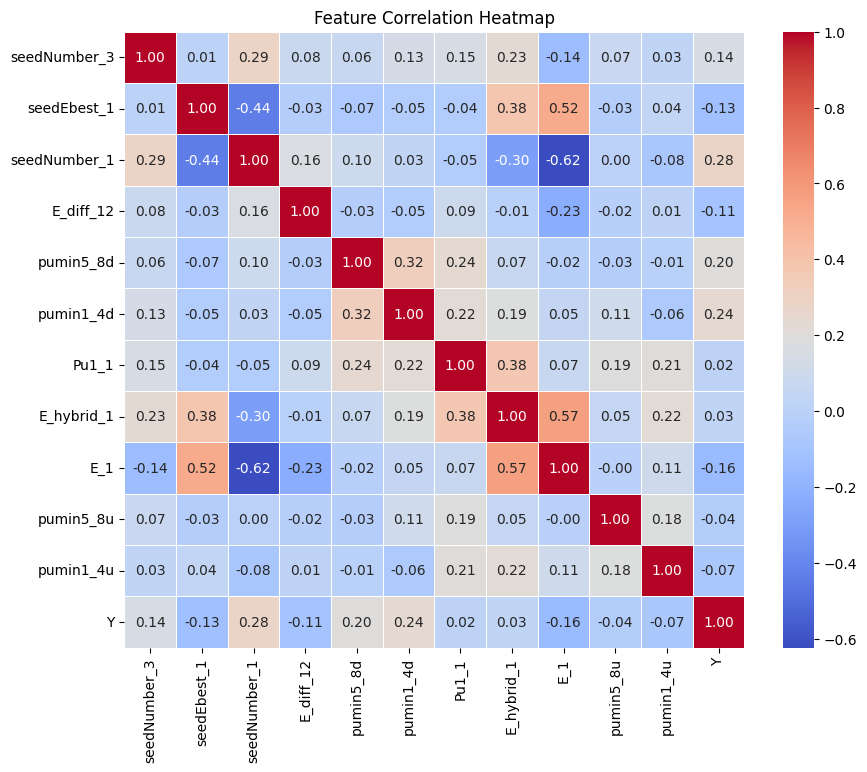

Best Model: Decision Tree


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("transformed_data.csv")

# Define features based on correlation data
selected_features = ["seedNumber_3", "seedEbest_1", "seedNumber_1", "E_diff_12", "pumin5_8d", "pumin1_4d",
                     "Pu1_1", "E_hybrid_1", "E_1", "pumin5_8u", "pumin1_4u"]

y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    predictions = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}
        predictions[name] = y_pred
    
    results_df = pd.DataFrame(results).T
    return results_df.sort_values(by="R2 Score", ascending=False), predictions

# Evaluate models without scaling
results_no_scaling, predictions_no_scaling = evaluate_models(X_train, X_test, y_train, y_test)

# Standardization (StandardScaler)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
results_standardized, predictions_standardized = evaluate_models(X_train_standardized, X_test_standardized, y_train, y_test)

# Normalization (MinMaxScaler)
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)
results_normalized, predictions_normalized = evaluate_models(X_train_normalized, X_test_normalized, y_train, y_test)

# Save results to CSV
results_no_scaling.to_csv("results_no_scaling.csv")
results_standardized.to_csv("results_standardized.csv")
results_normalized.to_csv("results_normalized.csv")

# Select the best model
best_model_name = results_standardized.index[0]  # Selecting the best model after standardization
best_model = models[best_model_name]
best_model.fit(X_train_standardized, y_train)
best_predictions = best_model.predict(X_test_standardized)

# Save best model predictions
pd.DataFrame({"Actual": y_test, "Predicted": best_predictions}).to_csv("best_model_predictions.csv", index=False)

### PLOTS ###

# 1. Regression plot (Actual vs. Predicted)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=best_predictions, alpha=0.75)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs. Predicted ({best_model_name})")
plt.savefig("regression_plot.png")
plt.show()

# 2. Residual plot (errors)
residuals = y_test - best_predictions
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=20)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title(f"Residual Distribution ({best_model_name})")
plt.savefig("residual_plot.png")
plt.show()

# 3. Feature Importance (For Tree-based models)
if best_model_name in ["Random Forest", "Gradient Boosting", "Decision Tree"]:
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({"Feature": selected_features, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title(f"Feature Importance ({best_model_name})")
    plt.savefig("feature_importance.png")
    plt.show()

    # Save feature importance
    importance_df.to_csv("feature_importance.csv", index=False)

# 4. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[selected_features + ["Y"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

# 5. Feature Weights (For Linear Regression)
if best_model_name == "Linear Regression":
    weights = pd.DataFrame({"Feature": selected_features, "Weight": best_model.coef_})
    weights = weights.sort_values(by="Weight", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x="Weight", y="Feature", data=weights, palette="coolwarm")
    plt.xlabel("Weight Coefficient")
    plt.ylabel("Features")
    plt.title("Feature Weights (Linear Regression)")
    plt.savefig("feature_weights.png")
    plt.show()

    # Save feature weights
    weights.to_csv("feature_weights.csv", index=False)

print(f"Best Model: {best_model_name}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Load dataset
data = pd.read_csv("transformed_data.csv")

# Define features based on correlation data
selected_features = ["seedNumber_3", "seedEbest_1", "seedNumber_1", "E_diff_12", "pumin5_8d", "pumin1_4d", "Pu1_1", "E_hybrid_1", "E_1", "pumin5_8u", "pumin1_4u", "E_diff_12"]

y = data['Y']  # Target variable
X = data[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}
    
    results_df = pd.DataFrame(results).T
    return results_df.sort_values(by="R2 Score", ascending=False)

# **1. Without Normalization or Standardization**
results_no_scaling = evaluate_models(X_train, X_test, y_train, y_test)

# **2. With Standardization (StandardScaler)**
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

results_standardized = evaluate_models(X_train_standardized, X_test_standardized, y_train, y_test)

# **3. With Normalization (MinMaxScaler)**
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

results_normalized = evaluate_models(X_train_normalized, X_test_normalized, y_train, y_test)

# Display Results
print("Results without scaling:\n", results_no_scaling)
print("\nResults with Standardization:\n", results_standardized)
print("\nResults with Normalization:\n", results_normalized)


Results without scaling:
                         R2 Score       MAE      RMSE
K-Nearest Neighbors     0.340659  0.059652  0.096668
Linear Regression       0.277498  0.065100  0.101192
Gradient Boosting       0.271228  0.067866  0.101630
Random Forest           0.255512  0.068909  0.102720
Support Vector Machine  0.094834  0.080523  0.113264
Decision Tree           0.073852  0.074348  0.114569

Results with Standardization:
                         R2 Score       MAE      RMSE
Support Vector Machine  0.369941  0.067554  0.094497
K-Nearest Neighbors     0.334585  0.066870  0.097112
Linear Regression       0.277498  0.065100  0.101192
Gradient Boosting       0.266930  0.068294  0.101930
Random Forest           0.255249  0.068930  0.102738
Decision Tree           0.073852  0.074348  0.114569

Results with Normalization:
                         R2 Score       MAE      RMSE
K-Nearest Neighbors     0.384405  0.068609  0.093406
Support Vector Machine  0.331062  0.071275  0.097369
Linear Regr